In [1]:
%matplotlib inline
import numpy as np
import spacy
import matplotlib.pyplot as plt

In [2]:
sp_en = spacy.load('en')

In [3]:
f = open('./pubmed_result_climate_change_korea.txt')

fr = f.read()

In [4]:
abstract_arglist = []
for n,l in enumerate(fr.split('\r\n\r\n')):
    key = 'Author information:'
    if l[0:len(key)] == key:
        abstract_arglist.append(n+1)

In [5]:
abstract_list = [x.replace('\n',' ') for x in np.array(fr.split('\r\n\r\n'))[abstract_arglist]]

abstract_sentences = []
for x in abstract_list:
    abstract_sentences += [i.strip() for i in x.split('. ') ]

In [6]:
X_train_sp = []
for sentence in abstract_sentences:
    X_train_sp += [' '.join([x.lemma_ for x in sp_en(unicode(sentence.decode("utf8")))])]

In [7]:
abstract_sentences[0]

'The Holocene variability in the East Asian summer monsoon (EASM) based on\r speleothem \xce\xb4(18)O records has inconsistencies in timing, duration, and expression\r of millennial-scale events among nearby regions, and even within the same cave.\r Here, we present another stalagmite \xce\xb4(18)O record with multi-decadal time\r resolution from the temperate Korean Peninsula (KP) for the last 5500 years in\r order to compare with Holocene millennial-scale EASM events from Southeast Asia'

In [8]:
X_train_sp[0]

u'the holocene variability in the east asian summer monsoon ( easm ) base on \r  speleothem \u03b4(18)o record have inconsistency in time , duration , and expression \r  of millennial - scale event among nearby region , and even within the same cave . \r  here , -PRON- present another stalagmite \u03b4(18)o record with multi - decadal time \r  resolution from the temperate korean peninsula ( kp ) for the last 5500 year in \r  order to compare with holocene millennial - scale easm event from southeast asia'

In [65]:
def do_spacy(sentences):
    X_train_sp = []
    for sentence in sentences:
        X_train_sp += [' '.join([x.lemma_ for x in sp_en(unicode(sentence))])]
    print "Before :", sentences[0]
    print "After :", X_train_sp[0]
    return X_train_sp

In [9]:
from sklearn.feature_extraction.text import CountVectorizer

In [10]:
cv = CountVectorizer(stop_words='english',min_df=5)

In [11]:
bow = cv.fit_transform(X_train_sp)

In [12]:
x_train_mat = bow.toarray()

In [55]:
def do_vectorize(x_train):
    from sklearn.feature_extraction.text import CountVectorizer
    cv = CountVectorizer(stop_words='english',min_df=5)
    bow = cv.fit_transform(x_train)
    return bow.toarray()

In [13]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

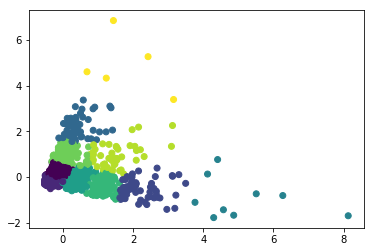

In [14]:
pca = PCA(n_components=2)
x_train_mat_pc = pca.fit_transform(x_train_mat)
km = KMeans(n_clusters=10)
cluster = km.fit_predict(x_train_mat_pc)
plt.scatter(x_train_mat_pc[:,0],x_train_mat_pc[:,1],c=cluster)

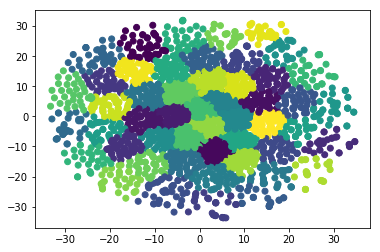

In [15]:
tnse = TSNE(random_state=0)
x_train_mat_tsne = tnse.fit_transform(x_train_mat)
km = KMeans(n_clusters=50)
cluster = km.fit_predict(x_train_mat_tsne)
plt.scatter(x_train_mat_tsne[:,0],x_train_mat_tsne[:,1],c=cluster)

In [16]:
pca = PCA(n_components=10)
x_train_mat_pc = pca.fit_transform(x_train_mat)
km = KMeans(n_clusters=100)
cluster = km.fit_predict(x_train_mat_pc)

In [17]:
from collections import Counter

In [18]:
#Counter(cluster)
np.argmax(Counter(cluster).values())

0

In [19]:
m = cluster == 1
print len(np.array(abstract_sentences)[m])

np.array(abstract_sentences)[m]

186

In [25]:
# 문장추출 알고리즘을 사용한다면 
from nltk import sent_tokenize

In [44]:
abstracts = []
for each in fr.split('\r\n\r\n\r\n'):
    for n,l in enumerate(each.split('\r\n\r\n')):
        key = 'Author information:'
        if l[0:len(key)] == key:
            abstracts.append(each.split('\r\n\r\n')[n+1].strip().replace('\r\n',' '))


In [63]:
sentences = []
for abstract in abstracts:
    sentences += sent_tokenize(abstract.decode("utf8"))

In [66]:
x_train_sp_nltk = do_spacy(sentences)

Before : The Holocene variability in the East Asian summer monsoon (EASM) based on speleothem δ(18)O records has inconsistencies in timing, duration, and expression of millennial-scale events among nearby regions, and even within the same cave.
After : the holocene variability in the east asian summer monsoon ( easm ) base on speleothem δ(18)o record have inconsistency in time , duration , and expression of millennial - scale event among nearby region , and even within the same cave .


In [67]:
x_train_sp_bow = do_vectorize(x_train_sp_nltk)

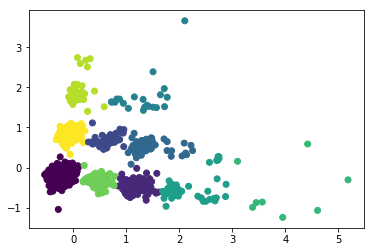

In [68]:
pca = PCA(n_components=2)
x_train_mat_pc = pca.fit_transform(x_train_sp_bow)
km = KMeans(n_clusters=10)
cluster = km.fit_predict(x_train_mat_pc)
plt.scatter(x_train_mat_pc[:,0],x_train_mat_pc[:,1],c=cluster)

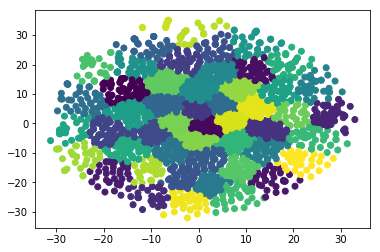

In [69]:
tnse = TSNE(random_state=0)
x_train_mat_tsne = tnse.fit_transform(x_train_sp_bow)
km = KMeans(n_clusters=50)
cluster = km.fit_predict(x_train_mat_tsne)
plt.scatter(x_train_mat_tsne[:,0],x_train_mat_tsne[:,1],c=cluster)

In [71]:
pca = PCA(n_components=10)
x_train_mat_pc = pca.fit_transform(x_train_sp_bow)
km = KMeans(n_clusters=100)
cluster = km.fit_predict(x_train_mat_pc)

In [74]:
m = cluster == 0
print len(np.array(sentences)[m])
np.array(sentences)[m]

55


array([ u'Relative percentage differences (RPD) of odorous gases between day and night times at landfill site were below 10%, which indicates that the concentration differences in day and night were not severe.',
       u'More than ten samples were collected from each of the three municipal solid waste (MSW) facilities between June 2013 and March 2015 and the biomass fraction was analyzed.',
       u'The Kruskal-Wallis test results showed that the average monthly, quarterly, semi-annual, and annual values for all three MSW incineration facilities were equal.',
       u'Therefore, the biomass fraction at the MSW incineration facilities should  be calculated on a yearly cycle which is the longest period of the temporal cycles tested.',
       u'The enhanced generation of CO in the presence of CO2 reached up to 15.15mol% (reference value: 0.369mol%) at 690\xb0C, which was equivalent to ~4000 times more generation of CO.',
       u'In addition to the enhanced generation of CO, the enhanced